In [62]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
import re
import string
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [2]:
speeches = pd.read_pickle('A:\\Data Analysis Jupyter\\Campaign-Analytics\\Code\\Cleaning and Wrangling\\speeches.pkl')

In [3]:
speeches.head()

,Year,Month,Day,Title,Speech,Date,no_punct,tokens,no_stopwords,nltk_Text
0,2010,10,29,2018\29_10_2010_PM’s address at Indian Communi...,"Hello!A country like Japan, this atmosphere of...",2010-10-29,helloa country like japan this atmosphere of t...,"[helloa, country, like, japan, this, atmospher...","[helloa, country, like, japan, atmosphere, aik...","(helloa, country, like, japan, atmosphere, aik..."
1,2014,10,2,2014\1_02_Oct_2014_Text_of_PMs_address_during_...,à¤­à¤¾à¤°à¤¤ à¤®à¤¾à¤¤à¤¾ à¤à¥ à¤à¤¯!à¤®à¤¹...,2014-10-02,à¤­à¤¾à¤°à¤¤ à¤®à¤¾à¤¤à¤¾ à¤à¥ à¤à¤¯à¤®à¤¹à...,"[à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®...","[à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®...","(à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®..."
2,2014,10,3,2014\2_03_Oct_2014_Text_of_PMs_first_Mann_ki_B...,à¤®à¥à¤°à¥ à¤ªà¥à¤¯à¤¾à¤°à¥ à¤¦à¥à¤¶à¤µà¤...,2014-10-03,à¤®à¥à¤°à¥ à¤ªà¥à¤¯à¤¾à¤°à¥ à¤¦à¥à¤¶à¤µà¤...,"[à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤...","[à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤...","(à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤..."
3,2014,10,3,2014\3_03_Oct_2014_English_rendering_of_text_o...,"My Dear Countrymen,Today is the holy festival ...",2014-10-03,my dear countrymentoday is the holy festival o...,"[my, dear, countrymentoday, is, the, holy, fes...","[dear, countrymentoday, holy, festival, vijay,...","(dear, countrymentoday, holy, festival, vijay,..."
4,2014,10,11,2014\6_11_Oct_2014_PMs_remarks_at_the_launch_o...,"Prime Minister, Shri Narendra Modi, today laun...",2014-10-11,prime minister shri narendra modi today launch...,"[prime, minister, shri, narendra, modi, today,...","[prime, minister, shri, narendra, modi, today,...","(prime, minister, shri, narendra, modi, today,..."


## Number of available speeches

In [4]:
len(speeches)

522

## Number of days in which at least one speech was given.

In [5]:
len(speeches.Date.unique())

385

## Maximum number of speeches in a day 


In [6]:
speeches['Date'].value_counts()

2015-11-12    4
2015-05-15    4
2018-10-21    4
2016-11-11    3
2016-07-11    3
2015-05-16    3
2017-05-12    3
2016-04-24    3
2016-11-13    3
2016-10-31    3
2016-03-12    3
2016-05-23    3
2015-05-17    3
2017-01-09    3
2016-02-21    3
2017-03-07    3
2015-06-28    3
2016-07-10    3
2015-07-09    3
2015-02-14    2
2014-11-30    2
2014-11-16    2
2019-02-17    2
2018-06-21    2
2017-06-24    2
2019-02-24    2
2015-05-31    2
2018-06-22    2
2017-04-08    2
2015-06-07    2
             ..
2017-01-11    1
2016-10-11    1
2017-01-07    1
2015-12-29    1
2016-03-03    1
2016-11-12    1
2015-03-14    1
2015-01-11    1
2018-06-15    1
2017-02-21    1
2015-10-31    1
2017-06-01    1
2018-09-26    1
2016-06-07    1
2016-08-08    1
2016-12-10    1
2015-12-21    1
2017-04-13    1
2017-08-15    1
2015-05-04    1
2016-10-26    1
2015-09-05    1
2015-11-06    1
2017-04-28    1
2016-01-16    1
2016-03-09    1
2017-07-01    1
2016-12-25    1
2015-09-03    1
2019-02-21    1
Name: Date, Length: 385,

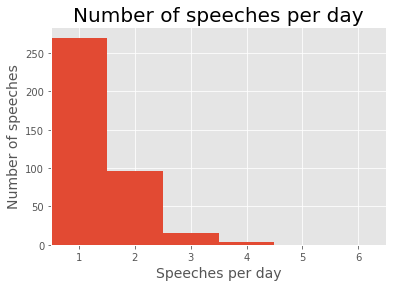

In [7]:
by_date = speeches['Date'].value_counts()
plt.style.use('ggplot')
by_date.plot.hist(bins=range(1,9), align='left')
plt.xticks(range(1,8))
plt.xlim(0.5, 6.5)
plt.title("Number of speeches per day", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Speeches per day", fontdict={'fontsize': 14});

## Number of speeches per day of a week

In [8]:
# getting day ofweek with dt method
speeches['Day'] = speeches['Date'].dt.dayofweek

# dictionary to label 
days = {0:'Monday', 1:'Tuesday', 2:'Wednsday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

# function to label corresponing categoricalvariable with name of the weekday
speeches['Day'] = speeches['Day'].apply(lambda x:days[x])

In [9]:
# ordering the leves of factor variables
speeches['Day'] = pd.Categorical(speeches['Day'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [10]:
by_weekday = speeches['Day'].value_counts().sortlevel()
by_weekday

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  """Entry point for launching an IPython kernel.


Monday        73
Tuesday       58
Wednesday      0
Thursday      59
Friday        90
Saturday      79
Sunday       118
Name: Day, dtype: int64

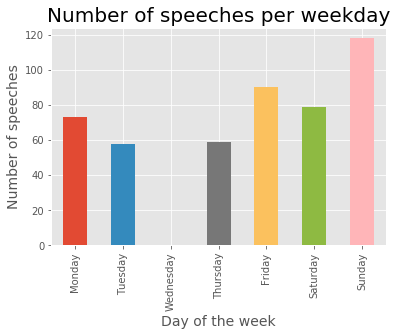

In [11]:
by_weekday.plot.bar()
plt.title("Number of speeches per weekday", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Day of the week", fontdict={'fontsize': 14});

## Number of speeches per month 

In [12]:
by_month = speeches['Month'].value_counts().sort_index()
by_month

1     47
2     58
3     29
4     40
5     49
6     52
7     46
8     27
9     30
10    53
11    62
12    29
Name: Month, dtype: int64

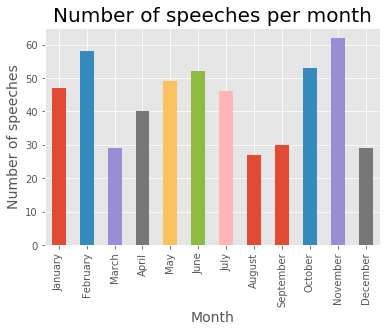

In [13]:
by_month.plot.bar()
plt.title("Number of speeches per month", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(range(12), labels, rotation='vertical');

## Number of speeches per year

In [14]:
by_year = speeches['Year'].value_counts().sort_index()
by_year

2010      1
2014     38
2015    148
2016    160
2017     92
2018     43
2019     40
Name: Year, dtype: int64

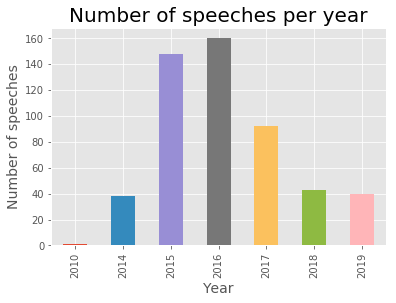

In [15]:
by_year.plot.bar()
plt.title("Number of speeches per year", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Year", fontdict={'fontsize': 14})
labels = ['2010','2014','2015','2016','2017','2018','2019']
plt.xticks(range(7), labels, rotation='vertical');

In [16]:
by_year_month = pd.groupby(speeches, by=[speeches['Date'].dt.year, speeches['Date'].dt.month])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


In [17]:
month_labels = ['2014-1','2014-2','2014-3','2014-4','2014-5','2014-6','2014-7','2014-8','2014-9','2014-10','2014-11','2014-12',\
          '2015-1','2015-2','2015-3','2015-4','2015-5','2015-6','2015-7','2015-8','2015-9','2015-10','2015-11','2015-12',\
          '2016-1','2016-2','2016-3','2016-4','2016-5','2016-6','2016-7','201-8','2016-9','2016-10','2016-11','2016-12',\
          '2017-1','2017-2','2017-3','2017-4','2017-5','2017-6','2017-7','2017-8','2017-9','2017-10','2017-11','2017-12',\
          '2018-1','2018-2','2018-3','2018-4','2018-5','2018-6','2018-7','2018-8','2018-9','2018-10','2018-11','2018-12',\
          '2019-1','2019-2','2019-3']

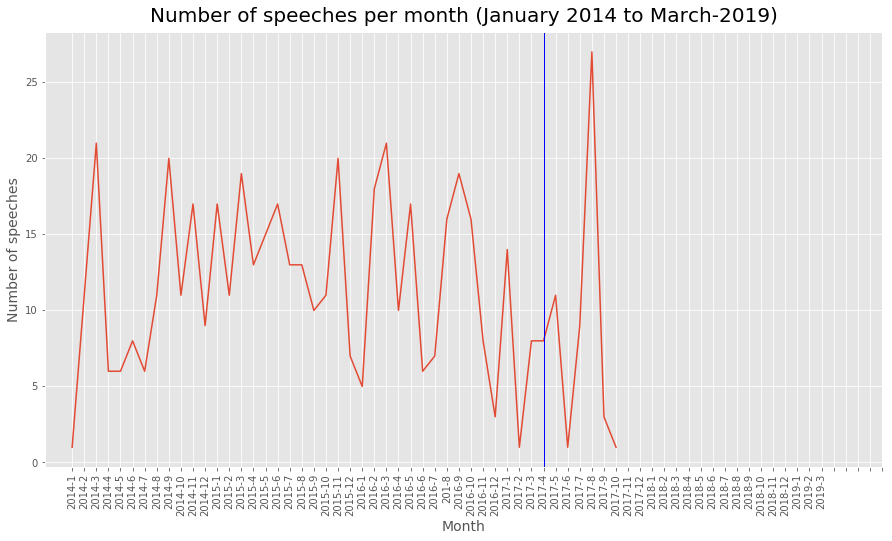

In [63]:
by_month = by_year_month['Month'].agg('count')
by_month.plot()
plt.title("Number of speeches per month (January 2014 to March-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.axvline(x=39, linewidth=1, color='b');

In [19]:
speeches.head(10)

,Year,Month,Day,Title,Speech,Date,no_punct,tokens,no_stopwords,nltk_Text
0,2010,10,Friday,2018\29_10_2010_PM’s address at Indian Communi...,"Hello!A country like Japan, this atmosphere of...",2010-10-29,helloa country like japan this atmosphere of t...,"[helloa, country, like, japan, this, atmospher...","[helloa, country, like, japan, atmosphere, aik...","(helloa, country, like, japan, atmosphere, aik..."
1,2014,10,Thursday,2014\1_02_Oct_2014_Text_of_PMs_address_during_...,à¤­à¤¾à¤°à¤¤ à¤®à¤¾à¤¤à¤¾ à¤à¥ à¤à¤¯!à¤®à¤¹...,2014-10-02,à¤­à¤¾à¤°à¤¤ à¤®à¤¾à¤¤à¤¾ à¤à¥ à¤à¤¯à¤®à¤¹à...,"[à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®...","[à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®...","(à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®..."
2,2014,10,Friday,2014\2_03_Oct_2014_Text_of_PMs_first_Mann_ki_B...,à¤®à¥à¤°à¥ à¤ªà¥à¤¯à¤¾à¤°à¥ à¤¦à¥à¤¶à¤µà¤...,2014-10-03,à¤®à¥à¤°à¥ à¤ªà¥à¤¯à¤¾à¤°à¥ à¤¦à¥à¤¶à¤µà¤...,"[à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤...","[à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤...","(à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤..."
3,2014,10,Friday,2014\3_03_Oct_2014_English_rendering_of_text_o...,"My Dear Countrymen,Today is the holy festival ...",2014-10-03,my dear countrymentoday is the holy festival o...,"[my, dear, countrymentoday, is, the, holy, fes...","[dear, countrymentoday, holy, festival, vijay,...","(dear, countrymentoday, holy, festival, vijay,..."
4,2014,10,Saturday,2014\6_11_Oct_2014_PMs_remarks_at_the_launch_o...,"Prime Minister, Shri Narendra Modi, today laun...",2014-10-11,prime minister shri narendra modi today launch...,"[prime, minister, shri, narendra, modi, today,...","[prime, minister, shri, narendra, modi, today,...","(prime, minister, shri, narendra, modi, today,..."
5,2014,10,Saturday,2014\5_11_Oct_2014_Text_of_PMs_address_at_the_...,à¤®à¤à¤¤à¥à¤°à¤¿à¤ªà¤°à¤¿à¤·à¤¦ à¤à¥ à¤®à¥...,2014-10-11,à¤®à¤à¤¤à¥à¤°à¤à¤ªà¤°à¤à¤·à¤¦ à¤à¥ à¤®à¥à...,"[à¤®à¤à¤¤à¥à¤°à¤à¤ªà¤°à¤à¤·à¤¦, à¤à¥, à¤®à...","[à¤®à¤à¤¤à¥à¤°à¤à¤ªà¤°à¤à¤·à¤¦, à¤à¥, à¤®à...","(à¤®à¤à¤¤à¥à¤°à¤à¤ªà¤°à¤à¤·à¤¦, à¤à¥, à¤®à..."
6,2014,10,Tuesday,2014\8_14_Oct_2014_Text_of_PMs_statement_after...,à¤ªà¤°à¤¸à¥à¤ à¤à¥ à¤­à¤¯à¤à¤à¤° cyclone...,2014-10-14,à¤ªà¤°à¤¸à¥à¤ à¤à¥ à¤­à¤¯à¤à¤à¤° cyclone...,"[à¤ªà¤°à¤¸à¥à¤, à¤à¥, à¤­à¤¯à¤à¤à¤°, cyc...","[à¤ªà¤°à¤¸à¥à¤, à¤à¥, à¤­à¤¯à¤à¤à¤°, cyc...","(à¤ªà¤°à¤¸à¥à¤, à¤à¥, à¤­à¤¯à¤à¤à¤°, cyc..."
7,2014,10,Thursday,2014\9_16_Oct_2014_Text_of_PMs_address_during_...,à¤à¤ªà¤¸à¥à¤¥à¤¿à¤¤ à¤¸à¤­à¥ à¤®à¤¹à¤¾à¤¨à¥...,2014-10-16,à¤à¤ªà¤¸à¥à¤¥à¤à¤¤ à¤¸à¤­à¥ à¤®à¤¹à¤¾à¤¨à¥...,"[à¤à¤ªà¤¸à¥à¤¥à¤à¤¤, à¤¸à¤­à¥, à¤®à¤¹à¤¾à¤¨...","[à¤à¤ªà¤¸à¥à¤¥à¤à¤¤, à¤¸à¤­à¥, à¤®à¤¹à¤¾à¤¨...","(à¤à¤ªà¤¸à¥à¤¥à¤à¤¤, à¤¸à¤­à¥, à¤®à¤¹à¤¾à¤¨..."
8,2014,10,Thursday,2014\11_23_Oct_2014_Text_of_PMs_address_to_Off...,"प्‍यारे जवानों,आप सबको बड़ा सरप्राइज हुआ होगा ...",2014-10-23,प्‍यारे जवानोंआप सबको बड़ा सरप्राइज हुआ होगा क...,"[प्‍यारे, जवानोंआप, सबको, बड़ा, सरप्राइज, हुआ,...","[प्‍यारे, जवानोंआप, सबको, बड़ा, सरप्राइज, हुआ,...","(प्‍यारे, जवानोंआप, सबको, बड़ा, सरप्राइज, हुआ,..."
9,2014,10,Saturday,2014\12_25_Oct_2014_Text_of_PMs_address_at_the...,à¤à¤ªà¤¸à¥à¤¥à¤¿âà¤¤ à¤¸à¤­à¥ à¤µà¤°à¤¿à¤...,2014-10-25,à¤à¤ªà¤¸à¥à¤¥à¤âà¤¤ à¤¸à¤­à¥ à¤µà¤°à¤à¤·à...,"[à¤à¤ªà¤¸à¥à¤¥à¤âà¤¤, à¤¸à¤­à¥, à¤µà¤°à¤à...","[à¤à¤ªà¤¸à¥à¤¥à¤âà¤¤, à¤¸à¤­à¥, à¤µà¤°à¤à...","(à¤à¤ªà¤¸à¥à¤¥à¤âà¤¤, à¤¸à¤­à¥, à¤µà¤°à¤à..."


### Word Cloud

In [20]:
# add all speeches into one string 

all_speeches = speeches.Speech.str.cat(sep=',')

In [21]:
punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [22]:
# To strip punctuation from string

def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [23]:
all_speeches = no_punct(all_speeches)

In [24]:
# Lowercase

all_speeches = all_speeches.lower()

In [25]:
len(all_speeches)

10095332

In [26]:
# Tokenize text

all_tokens = word_tokenize(all_speeches)

In [27]:
# Eliminate stopwords in English

def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_eng]

In [28]:
stopwords_eng = stopwords.words('english')

In [29]:
# drop stopwords
all_tokens = no_stopwords(all_tokens)

In [30]:
len(all_tokens)

1007495

In [31]:
# See sorted frequency distribution of all tokens

nltk.FreqDist(all_tokens).most_common()

[('à¤\x95à¥\x87', 15355),
 ('à¤¹à¥\x88', 13158),
 ('à¤', 13057),
 ('à¤®à¥\x87à¤\x82', 11932),
 ('à¤\x94à¤°', 8714),
 ('à¤\x95à¥\x8b', 8323),
 ('à¤\x95à¥\x80', 8117),
 ('à¤¹à¥\x88à¥¤', 7652),
 ('à¤\x95à¤¾', 7515),
 ('à¤¸à¥\x87', 7434),
 ('के', 6432),
 ('à¤\xadà¥\x80', 5898),
 ('है', 5681),
 ('à¤\x95à¤', 5560),
 ('à¤\x8fà¤\x95', 5426),
 ('à¤¤à¥\x8b', 5372),
 ('à¤¨à¤¹à¥\x80à¤\x82', 5177),
 ('में', 4879),
 ('india', 4606),
 ('à¤¹à¥\x88à¤\x82', 4490),
 ('à¤¯à¥\x87', 4176),
 ('à¤¹à¥\x8b', 3804),
 ('à¤¹à¤®', 3769),
 ('«', 3692),
 ('à¤²à¤à¤\x8f', 3600),
 ('à¤®à¥\x88à¤\x82', 3548),
 ('को', 3440),
 ('और', 3365),
 ('की', 3350),
 ('का', 3303),
 ('à¤\x9cà¥\x8b', 3280),
 ('है।', 3013),
 ('à¤µà¥\x8b', 3001),
 ('से', 2915),
 ('also', 2850),
 ('pm', 2763),
 ('à¤ªà¤°', 2738),
 ('à¤¦à¥\x87à¤¶', 2641),
 ('à¤\x95à¤°', 2398),
 ('à¤¹à¥\x88à¤\x82à¥¤', 2393),
 ('à¤\x87à¤¸', 2349),
 ('people', 2262),
 ('à¤²à¥\x87à¤\x95à¤à¤¨', 2257),
 ('कि', 2178),
 ('भी', 2171),
 ('à¤¨à¥\x87', 2144),
 ('एक', 2130),
 ('à¤¬à¤¹à¥\

In [32]:
of_interest = [ "country","people","gorvernment","freedom", "democracy", "nation", "world",
    "environment", "oil", "soil", "jobs", "education", "employment", "security",
    "terrorism", "pakistan", "china", "russia", "america", "terrorist", "gst", "pulwama",
    "surgical", "smart", "growth", "strike", "kashmir","violence", "rahul", "money", "election", "friends", "backward",
    "gujarat", "suicide","farmers", "development", "startup", "healthcare", "kisan","tourism", "army","corruption"]

In [33]:
# filtering list of all tokens based on list of words of interest

tokens_of_interest = [w for w in all_tokens if w in of_interest]

In [34]:
# joining list in string

tokens_of_interest_str = ' '.join(tokens_of_interest)

In [35]:
# writing it to a txt file

with open('A:\\Data Analysis Jupyter\\Campaign-Analytics\\Code\\Analysis\\tokens_of_interest_str.txt', 'a') as f:
    f.write(tokens_of_interest_str)

In [36]:
fdist = nltk.FreqDist(tokens_of_interest)

In [37]:
fdist.most_common()

[('people', 2262),
 ('country', 1775),
 ('world', 1682),
 ('development', 1147),
 ('nation', 619),
 ('farmers', 554),
 ('security', 509),
 ('growth', 381),
 ('friends', 350),
 ('money', 330),
 ('environment', 320),
 ('education', 278),
 ('terrorism', 231),
 ('freedom', 219),
 ('gujarat', 214),
 ('tourism', 209),
 ('democracy', 176),
 ('corruption', 162),
 ('employment', 147),
 ('smart', 144),
 ('gst', 144),
 ('soil', 131),
 ('startup', 126),
 ('china', 109),
 ('jobs', 89),
 ('healthcare', 87),
 ('army', 66),
 ('violence', 65),
 ('election', 59),
 ('russia', 56),
 ('kashmir', 51),
 ('kisan', 35),
 ('terrorist', 32),
 ('oil', 27),
 ('america', 26),
 ('strike', 22),
 ('pakistan', 22),
 ('backward', 17),
 ('surgical', 17),
 ('pulwama', 12),
 ('rahul', 3),
 ('suicide', 2)]

In [38]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [39]:
d = path.dirname('A:\\Data Analysis Jupyter\\Campaign-Analytics\\Code\\Analysis\\tokens_of_interest_str.txt')

In [40]:
# read the whole text
text = open(path.join(d, 'A:\\Data Analysis Jupyter\\Campaign-Analytics\\Code\\Analysis\\tokens_of_interest_str.txt')).read()

In [41]:
# read the mask image 
india_base = np.array(Image.open(path.join(d, "A:\\Data Analysis Jupyter\\Campaign-Analytics\\Code\\Analysis\\india_mask1.jpg")))

In [42]:
stopwords = set(STOPWORDS)

In [43]:
wc = WordCloud(background_color = "white", max_words = 2500, mask = india_base,
              stopwords = stopwords, contour_width = 3, contour_color = 'steelblue')

In [44]:
wc.generate(text)

In [45]:
wc.to_file(path.join(d, "wordcloud.png"))

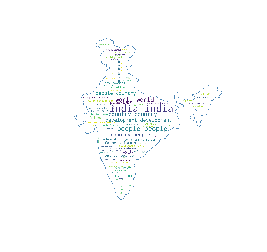

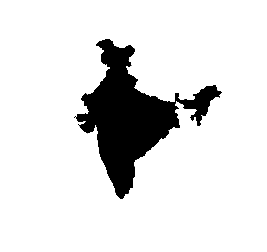

In [46]:
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(india_base, cmap = plt.cm.gray)
plt.axis("off")
plt.show()

In [48]:
speeches.tail()

,Year,Month,Day,Title,Speech,Date,no_punct,tokens,no_stopwords,nltk_Text
517,2019,2,Tuesday,2019\26_02_2019_PM’s speech at unveiling cerem...,﻿Hare Krishna - Hare KrishnaAshok's Chairman P...,2019-02-26,﻿hare krishna hare krishnaashoks chairman puj...,"[﻿hare, krishna, hare, krishnaashoks, chairman...","[﻿hare, krishna, hare, krishnaashoks, chairman...","(﻿hare, krishna, hare, krishnaashoks, chairman..."
518,2019,3,Friday,2019\01_03_2019_PM’s address after launch of d...,﻿Friends.\nI am delighted to be here in Kanyak...,2019-03-01,﻿friends\ni am delighted to be here in kanyaku...,"[﻿friends, i, am, delighted, to, be, here, in,...","[﻿friends, delighted, kanyakumari, begin, payi...","(﻿friends, delighted, kanyakumari, begin, payi..."
519,2019,3,Saturday,2019\02_03_2019_PM’s address at the India Toda...,"﻿Arun Puri, Chairman and Editor-in-Chief of In...",2019-03-02,﻿arun puri chairman and editorinchief of india...,"[﻿arun, puri, chairman, and, editorinchief, of...","[﻿arun, puri, chairman, editorinchief, india, ...","(﻿arun, puri, chairman, editorinchief, india, ..."
520,2019,3,Saturday,2019\02_03_2019_PM’s opening remarks on the oc...,﻿Congratulations to all the young colleagues w...,2019-03-02,﻿congratulations to all the young colleagues w...,"[﻿congratulations, to, all, the, young, collea...","[﻿congratulations, young, colleagues, working,...","(﻿congratulations, young, colleagues, working,..."
521,2019,10,Friday,2019\25_10_2019_PM’s Address at India-South Af...,﻿The President of the Republic of South Africa...,2019-10-25,﻿the president of the republic of south africa...,"[﻿the, president, of, the, republic, of, south...","[﻿the, president, republic, south, africa, exc...","(﻿the, president, republic, south, africa, exc..."


In [57]:
from collections import Counter

In [58]:
def col_counter(list_of_words, word):
    counter = Counter(w for w in list_of_words if w in word)
    return counter[word]

In [59]:
speeches['peace'] = [col_counter(speeches['no_stopwords'][i], 'peace') for i in range(len(speeches['no_stopwords']))]

In [60]:
speeches['terrorism'] = [col_counter(speeches['no_stopwords'][i], 'terrorism') for i in range(len(speeches['no_stopwords']))]

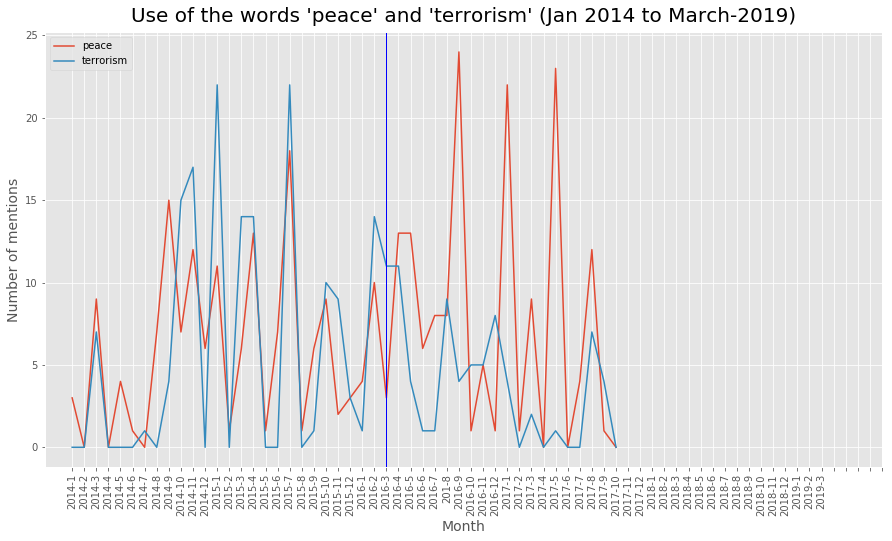

In [64]:
peace_by_month = by_year_month['peace'].agg('sum')
terrorism_by_month = by_year_month['terrorism'].agg('sum')
peace_by_month.plot()
terrorism_by_month.plot()
plt.title("Use of the words 'peace' and 'terrorism' (Jan 2014 to March-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.axvline(x=26, linewidth=1, color='b')
plt.legend(['peace', 'terrorism'], loc='upper left');

### Public Policy Areas

In [65]:
speeches['education'] = [col_counter(speeches['no_stopwords'][i], 'education') for i in range(len(speeches['no_stopwords']))]

In [66]:
speeches['poverty'] = [col_counter(speeches['no_stopwords'][i], 'poverty') for i in range(len(speeches['no_stopwords']))]

In [67]:
speeches['entrepreneurship'] = [col_counter(speeches['no_stopwords'][i], 'entrepreneurship') for i in range(len(speeches['no_stopwords']))]

In [68]:
speeches['buisness'] = [col_counter(speeches['no_stopwords'][i], 'buisness') for i in range(len(speeches['no_stopwords']))]

In [69]:
speeches['innovation'] = [col_counter(speeches['no_stopwords'][i], 'innovation') for i in range(len(speeches['no_stopwords']))]

In [70]:
speeches['industry'] = [col_counter(speeches['no_stopwords'][i], 'industry') for i in range(len(speeches['no_stopwords']))]

In [91]:
speeches['commercial'] = [col_counter(speeches['no_stopwords'][i], 'commercial') for i in range(len(speeches['no_stopwords']))]

In [72]:
speeches['employment'] = [col_counter(speeches['no_stopwords'][i], 'employment') for i in range(len(speeches['no_stopwords']))]

In [73]:
speeches['defense'] = [col_counter(speeches['no_stopwords'][i], 'defense') for i in range(len(speeches['no_stopwords']))]

In [74]:
speeches['criminal'] = [col_counter(speeches['no_stopwords'][i], 'criminal') for i in range(len(speeches['no_stopwords']))]

In [75]:
speeches['health'] = [col_counter(speeches['no_stopwords'][i], 'health') for i in range(len(speeches['no_stopwords']))]

In [76]:
speeches['environment'] = [col_counter(speeches['no_stopwords'][i], 'environment') for i in range(len(speeches['no_stopwords']))]

In [77]:
speeches['trade'] = [col_counter(speeches['no_stopwords'][i], 'trade') for i in range(len(speeches['no_stopwords']))]

In [78]:
speeches['nuclear'] = [col_counter(speeches['no_stopwords'][i], 'nuclear') for i in range(len(speeches['no_stopwords']))]

In [80]:
speeches['farmers'] = [col_counter(speeches['no_stopwords'][i], 'farmer') for i in range(len(speeches['no_stopwords']))]

In [82]:
speeches['kashmir'] = [col_counter(speeches['no_stopwords'][i], 'kashmir') for i in range(len(speeches['no_stopwords']))]

In [83]:
speeches['transport'] = [col_counter(speeches['no_stopwords'][i], 'transport') for i in range(len(speeches['no_stopwords']))]

In [94]:
speeches['cleanliness'] = [col_counter(speeches['no_stopwords'][i], 'cleanliness') for i in range(len(speeches['no_stopwords']))]

In [85]:
speeches['infrastructure'] = [col_counter(speeches['no_stopwords'][i], 'infrastructure') for i in range(len(speeches['no_stopwords']))]

In [96]:
speeches['technology'] = [col_counter(speeches['no_stopwords'][i], 'technology') for i in range(len(speeches['no_stopwords']))]

In [86]:
speeches['yoga'] = [col_counter(speeches['no_stopwords'][i], 'yoga') for i in range(len(speeches['no_stopwords']))]

In [87]:
speeches['hindu'] = [col_counter(speeches['no_stopwords'][i], 'hindu') for i in range(len(speeches['no_stopwords']))]

In [92]:
speeches['muslim'] = [col_counter(speeches['no_stopwords'][i], 'muslim') for i in range(len(speeches['no_stopwords']))]

In [97]:
education_by_month = by_year_month['education'].agg('sum')
poverty_by_month = by_year_month['poverty'].agg('sum')
entrepreneurship_by_month = by_year_month['entrepreneurship'].agg('sum')
buisness_by_month = by_year_month['buisness'].agg('sum')
innovation_by_month = by_year_month['innovation'].agg('sum')
industry_by_month = by_year_month['industry'].agg('sum')
commercial_by_month = by_year_month['commercial'].agg('sum')
employment_by_month = by_year_month['employment'].agg('sum')
defense_by_month = by_year_month['defense'].agg('sum')
criminal_by_month = by_year_month['criminal'].agg('sum')
health_by_month = by_year_month['health'].agg('sum')
environment_by_month = by_year_month['environment'].agg('sum')
trade_by_month = by_year_month['trade'].agg('sum')
health_by_month = by_year_month['health'].agg('sum')
nuclear_by_month = by_year_month['nuclear'].agg('sum')
farmers_by_month = by_year_month['farmers'].agg('sum')
transport_by_month = by_year_month['transport'].agg('sum')
cleanliness_by_month = by_year_month['cleanliness'].agg('sum')
infrastructure_by_month = by_year_month['infrastructure'].agg('sum')
technology_by_month = by_year_month['technology'].agg('sum')
yoga_by_month = by_year_month['yoga'].agg('sum')
hindu_by_month = by_year_month['hindu'].agg('sum')
muslim_by_month = by_year_month['muslim'].agg('sum')

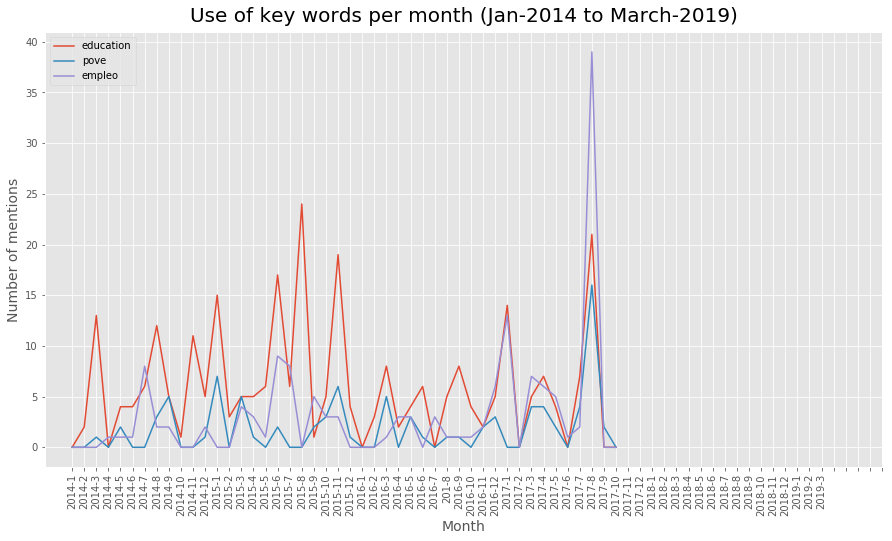

In [100]:
education_by_month.plot()
poverty_by_month.plot()
employment_by_month.plot()

plt.title("Use of key words per month (Jan-2014 to March-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['education','pove','empleo'], loc='upper left');

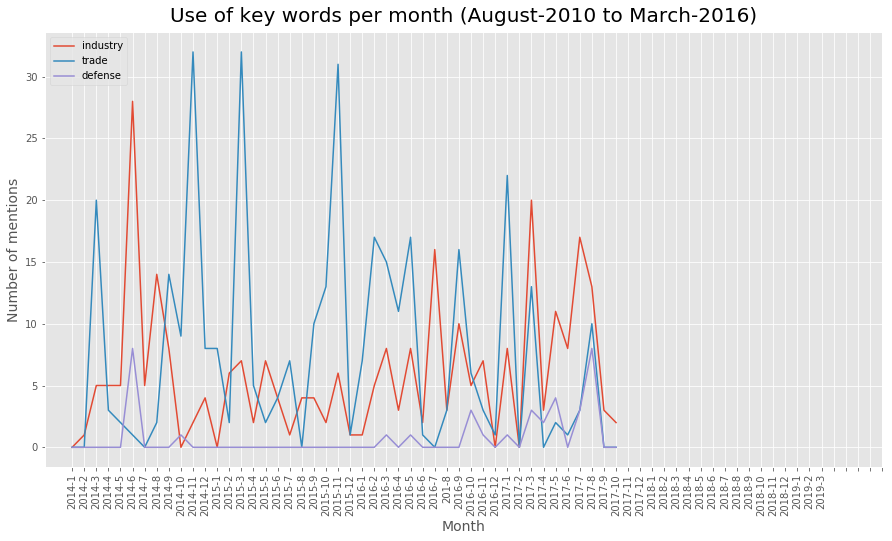

In [102]:
industry_by_month.plot()
trade_by_month.plot()
defense_by_month.plot()

plt.title("Use of key words per month (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['industry','trade','defense'], loc='upper left');

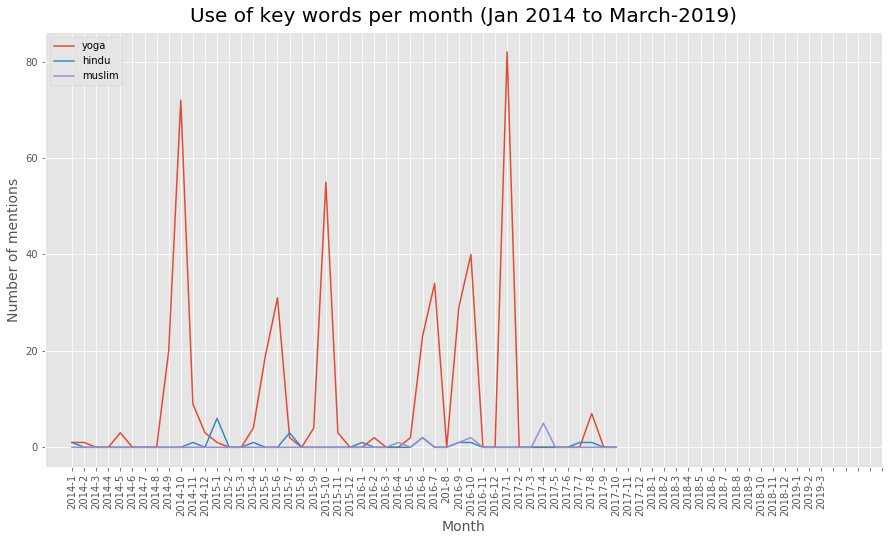

In [103]:
yoga_by_month.plot()
hindu_by_month.plot()
muslim_by_month.plot()

plt.title("Use of key words per month (Jan 2014 to March-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['yoga','hindu','muslim'], loc='upper left');

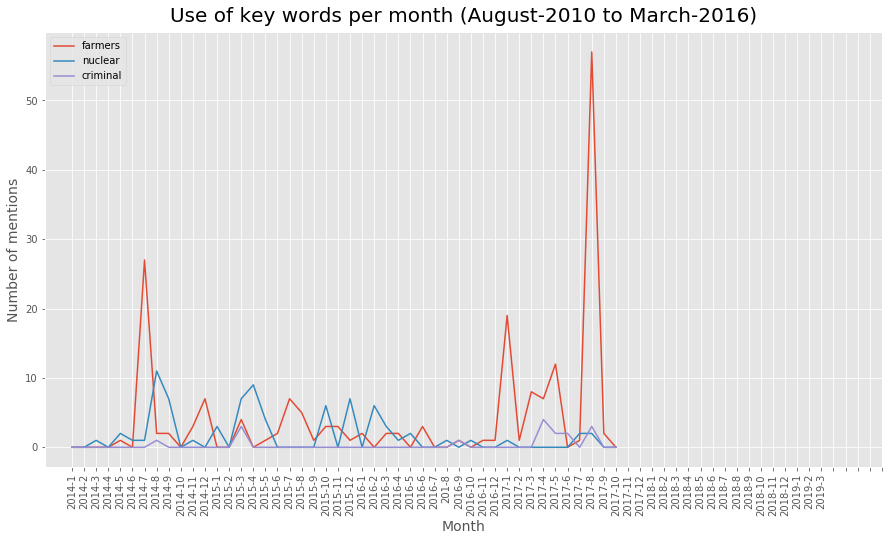

In [104]:
farmers_by_month.plot()
nuclear_by_month.plot()
criminal_by_month.plot()

plt.title("Use of key words per month (August-2010 to March-2016)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['farmers','nuclear','criminal'], loc='upper left');